In [20]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from nltk.classify import SklearnClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.svm import SVR,NuSVR,LinearSVR,SVC #support vector regression
from sklearn.linear_model import LinearRegression,Ridge,Lasso#Ridge() and Lasso()
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import StratifiedKFold
test = pd.read_csv("./test.csv")
train = pd.read_csv("./train.csv")
train.head()

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,07/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,...,3.0,5,3,4,5,5,4,3,4,5653753.0
1,1,02/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,...,3.0,0,0,0,0,0,0,0,0,6923131.0
2,2,03/09/2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,...,3.0,0,0,0,0,0,0,0,0,2055379.0
3,3,02/02/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,...,7.5,25,12,10,6,18,12,12,6,2675511.0
4,4,05/09/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,...,3.0,5,1,3,2,3,4,3,3,4316715.0


In [5]:
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 43 columns):
Id            137 non-null int64
Open Date     137 non-null object
City          137 non-null object
City Group    137 non-null object
Type          137 non-null object
P1            137 non-null int64
P2            137 non-null float64
P3            137 non-null float64
P4            137 non-null float64
P5            137 non-null int64
P6            137 non-null int64
P7            137 non-null int64
P8            137 non-null int64
P9            137 non-null int64
P10           137 non-null int64
P11           137 non-null int64
P12           137 non-null int64
P13           137 non-null float64
P14           137 non-null int64
P15           137 non-null int64
P16           137 non-null int64
P17           137 non-null int64
P18           137 non-null int64
P19           137 non-null int64
P20           137 non-null int64
P21           137 non-null int64
P22           137 non-nul

In [21]:
train['P29'] = train['P29'].astype(int)
test['P29']    = test['P29'].astype(int)
test["P29"].fillna(test["P29"].median(), inplace=True)
train['P26'] = train['P26'].astype(int)
test['P26']    = test['P26'].astype(int)
train['P27'] = train['P27'].astype(int)
test['P27']    = test['P27'].astype(int)
train['P28'] = train['P28'].astype(int)
test['P28']    = test['P28'].astype(int)
train['P13'] = train['P13'].astype(int)
test['P13']    = test['P13'].astype(int)
train['P2'] = train['P2'].astype(int)
test['P2']    = test['P2'].astype(int)
train['P3'] = train['P3'].astype(int)
test['P3']    = test['P3'].astype(int)
train['P4'] = train['P4'].astype(int)
test['P4']    = test['P4'].astype(int)

In [4]:
train.describe()

,Id,P1,P2,P3,P4,P5,P6,P7,P8,P9,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
count,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,...,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,1.370000e+02
mean,68.000000,4.014599,4.350365,4.306569,4.350365,2.007299,3.357664,5.423358,5.153285,5.445255,...,3.065693,2.729927,1.941606,2.525547,1.138686,2.489051,2.029197,2.211679,1.116788,4.453533e+06
std,39.692569,2.910391,1.422463,1.011420,0.974613,1.209620,2.134235,2.296809,1.858567,1.834793,...,1.558678,5.536647,3.512093,5.230117,1.698540,5.165093,3.436272,4.168211,1.790768,2.576072e+06
min,0.000000,1.000000,1.000000,0.000000,3.000000,1.000000,1.000000,1.000000,1.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.149870e+06
25%,34.000000,2.000000,4.000000,4.000000,4.000000,1.000000,2.000000,5.000000,4.000000,4.000000,...,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.999068e+06
50%,68.000000,3.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,5.000000,5.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.939804e+06
75%,102.000000,4.000000,5.000000,5.000000,5.000000,2.000000,4.000000,5.000000,5.000000,5.000000,...,3.000000,4.000000,3.000000,3.000000,2.000000,3.000000,4.000000,3.000000,2.000000,5.166635e+06
max,136.000000,12.000000,7.000000,7.000000,7.000000,8.000000,10.000000,10.000000,10.000000,10.000000,...,7.000000,25.000000,15.000000,25.000000,6.000000,24.000000,15.000000,20.000000,8.000000,1.969694e+07


In [7]:
train.describe(include=['object'])

,Open Date,City,City Group,Type
count,137,137,137,137
unique,134,34,2,3
top,02/23/2010,İstanbul,Big Cities,FC
freq,2,50,78,76


In [8]:
train['City'].value_counts()

İstanbul          50
Ankara            19
İzmir              9
Samsun             5
Bursa              5
Sakarya            4
Antalya            4
Kayseri            3
Eskişehir          3
Diyarbakır         3
Tekirdağ           3
Adana              3
Konya              2
Aydın              2
Trabzon            2
Muğla              2
Kastamonu          1
Kütahya            1
Bolu               1
Karabük            1
Denizli            1
Balıkesir          1
Gaziantep          1
Osmaniye           1
Şanlıurfa          1
Amasya             1
Edirne             1
Elazığ             1
Uşak               1
Afyonkarahisar     1
Isparta            1
Kırklareli         1
Tokat              1
Kocaeli            1
Name: City, dtype: int64

In [9]:
train['City Group'].value_counts()

Big Cities    78
Other         59
Name: City Group, dtype: int64

In [10]:
train['Type'].value_counts()

FC    76
IL    60
DT     1
Name: Type, dtype: int64

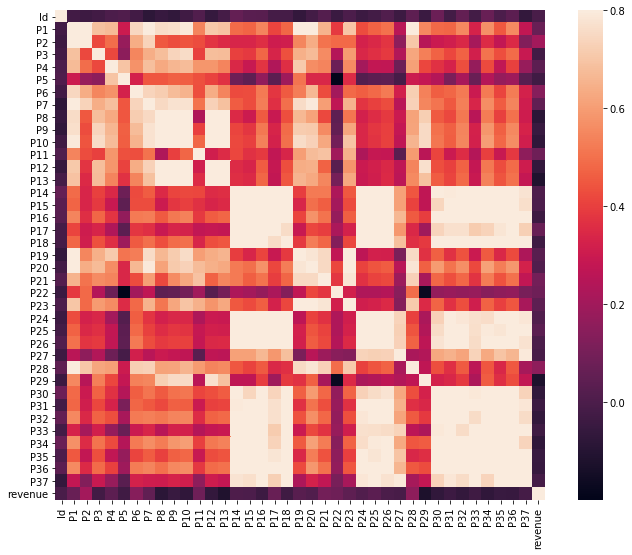

In [11]:
corrmat = train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

In [22]:
train["City Group"] = train["City Group"].map({"Big Cities": 0, "Other":1})
test["City Group"] = test["City Group"].map({"Big Cities": 0, "Other":1})
train["Type"] = train["Type"].map({"FC": 0, "IL":1,"DT":2})
test["Type"] = test["Type"].map({"FC": 0, "IL":1,"DT":2})
# Is city important or not
#How can we get groups of revenue and plot it against city groups and types to compare

In [23]:
test["Type"].fillna(test["Type"].median(), inplace=True)
train["revenue"].fillna(train["revenue"].median(), inplace=True)
train['revenue'] = train['revenue'].astype(int)
import numpy
Y_train=train["revenue"].apply(numpy.log)


In [24]:
X_train = train.drop(['City','Open Date','revenue','Id','City Group'], axis=1)
#X_test  = test.drop("Id",axis=1).copy()
X_test    = test.drop(['City','Open Date','Id','City Group'], axis=1)
X_train.head()
#X_test.head()

,Type,P1,P2,P3,P4,P5,P6,P7,P8,P9,...,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37
0,1,4,5,4,4,2,2,5,4,5,...,2,3,5,3,4,5,5,4,3,4
1,0,4,5,4,4,1,2,5,5,5,...,3,3,0,0,0,0,0,0,0,0
2,1,2,4,2,5,2,3,5,5,5,...,1,3,0,0,0,0,0,0,0,0
3,1,6,4,6,6,4,4,10,8,10,...,2,7,25,12,10,6,18,12,12,6
4,1,3,4,3,4,2,2,5,5,5,...,1,3,5,1,3,2,3,4,3,3


In [13]:
#from sklearn.impute import SimpleImputer
#my_imputer = SimpleImputer()
#imputed_X_train = my_imputer.fit_transform(X_train)
#imputed_X_test = my_imputer.transform(X_test)

In [14]:
#cols_with_missing = [col for col in X_train.columns 
#                                 if X_train[col].isnull().any()]
#X_train = X_train.drop(cols_with_missing, axis=1)
#X_test  = X_test.drop(cols_with_missing, axis=1)

In [25]:
test.head()
test=test.drop(['City','Open Date','City Group'], axis=1)

In [26]:
from sklearn import linear_model
import numpy 
from sklearn.ensemble import RandomForestRegressor
cls = RandomForestRegressor(n_estimators=100)
cls.fit(X_train, Y_train)
pred = cls.predict(X_test)
pred = numpy.exp(pred)
cls.score(X_train, Y_train)

0.849894187629257

In [27]:
output = pd.DataFrame({'Id': test['Id'],
                     'Prediction': pred})
output.to_csv('submission.csv', index=False)